In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# The data is tab separated and the first column has the gene names
# Remember that most things in python are zero-indexed, so the first
# column is index 0
df = pd.read_csv('../Pabio536/C4C5_ Numpy_and_pandas/data/GSE88741-expression.txt', sep='\t', index_col=0)
df_sample = df.sample(100, axis = 0, random_state = 333)
meta = pd.read_excel("../Pabio536/C4C5_ Numpy_and_pandas/data/GSE88741-metadata.xlsx", index_col=1)
print (df_sample.head())
print (meta.head())

             GSM2344965  GSM2344966  GSM2344967  GSM2344968  GSM2344969  \
gene_symbol                                                               
ASPDH                 1           1           1           4           0   
KRT18P19              0           0           0           1           0   
ANKIB1             2578        2432        2067        2634        3238   
AGGF1P6               0           0           0           0           0   
ZNF618             1489        1441        1089         997        1088   

             GSM2344970  GSM2344971  GSM2344972  GSM2344973  GSM2344974  \
gene_symbol                                                               
ASPDH                 1           2           1           1           2   
KRT18P19              0           2           1           2           0   
ANKIB1             3158        2373        1908        2324        2918   
AGGF1P6               0           0           0           0           2   
ZNF618              994 

In [39]:
# Assigning the sample titles to the columns in the data frame with the expression values
columns = meta.index
df_sample.columns = columns

# We want to look at the log2-transformed data values. To do this without getting negative infinity values, we will nudge the values that have 0 counts to be 0.01.
dfnz = df_sample
dfnz[dfnz == 0] = 0.01
print(dfnz.head())

# Do the log2 transform
df_log2 = dfnz.transform(np.log2)
print(df_log2.head())

Sample Title     FM_1     FM_2     FM_3  SK_MEL_28_1  SK_MEL_28_2  \
gene_symbol                                                         
ASPDH            1.00     1.00     1.00         4.00         0.01   
KRT18P19         0.01     0.01     0.01         1.00         0.01   
ANKIB1        2578.00  2432.00  2067.00      2634.00      3238.00   
AGGF1P6          0.01     0.01     0.01         0.01         0.01   
ZNF618        1489.00  1441.00  1089.00       997.00      1088.00   

Sample Title  SK_MEL_28_3  SK_MEL_147_1  SK_MEL_147_2  SK_MEL_147_3  \
gene_symbol                                                           
ASPDH                1.00          2.00          1.00          1.00   
KRT18P19             0.01          2.00          1.00          2.00   
ANKIB1            3158.00       2373.00       1908.00       2324.00   
AGGF1P6              0.01          0.01          0.01          0.01   
ZNF618             994.00       1947.00       1521.00       1617.00   

Sample Title  UACC

### Relational Plots

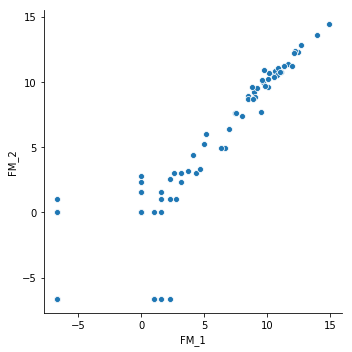

In [90]:
g = sns.relplot(x="FM_1", y="FM_2", data=df_log2)
plt.show()

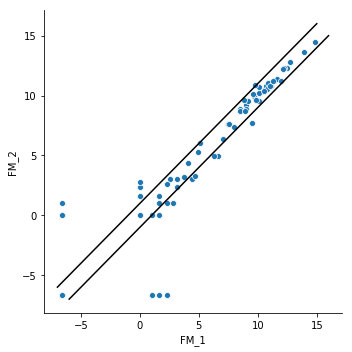

In [80]:
g = sns.relplot(x="FM_1", y="FM_2", data=df_log2)
plt.plot([-7,15],[-6,16],'k')
plt.plot([-6,16],[-7,15],'k')
plt.show()

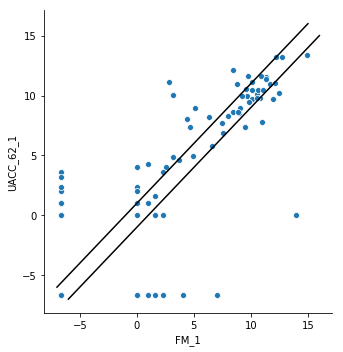

In [81]:
g = sns.relplot(x="FM_1", y="UACC_62_1", data=df_log2)
plt.plot([-7,15],[-6,16],'k')
plt.plot([-6,16],[-7,15],'k')
plt.show()

### Categorical Plots

In [71]:
#First, we need to reshape the data frame to be amenable to categorical plots. Seaborn prefers plotting by columns, so the variables of interest should be in the columns, and the different samples/replicates should be in the rows.
#We want to look at gene expression based on a phenotype. So we should also add a column with the phenotype information

# Transpose the data frame so that the genes are in the columns.
dfT = df_log2.T

# Add the phenotype and sample ID information from the "meta" data frame
dfT['Stage'] = meta.Stage
dfT['SampleName'] = dfT.index

dfT.head()

gene_symbol,ASPDH,KRT18P19,ANKIB1,AGGF1P6,ZNF618,IMPG2,SLC26A6,RP11-28P17.3,CYP51A1P2,UBE3AP2,...,KISS1,AEBP1,EHF,LUM,PLEKHM3,IQCG,AQP7P4,IGLV1-41,Stage,SampleName
Sample Title,,,,,,,,,,,,,,,,,,,,,
FM_1,0.000000,-6.643856,11.332037,-6.643856,10.540128,3.700440,10.112440,-6.643856,1.000000,0.000000,...,-6.643856,13.934520,-6.643856,2.807355,9.832890,8.011227,-6.643856,1.000000,primary melanocytes,FM_1
FM_2,0.000000,-6.643856,11.247928,-6.643856,10.492855,3.169925,9.575539,-6.643856,-6.643856,1.584963,...,-6.643856,13.626394,-6.643856,1.000000,9.652845,7.366322,-6.643856,-6.643856,primary melanocytes,FM_2
FM_3,0.000000,-6.643856,11.013323,-6.643856,10.088788,3.906891,10.558421,1.000000,2.321928,0.000000,...,-6.643856,14.614135,0.000000,10.437752,9.231221,7.499846,-6.643856,-6.643856,primary melanocytes,FM_3
SK_MEL_28_1,2.000000,0.000000,11.363040,-6.643856,9.961450,2.000000,9.816984,-6.643856,1.584963,2.000000,...,-6.643856,0.000000,0.000000,10.726218,9.224002,6.870365,-6.643856,-6.643856,metastatic,SK_MEL_28_1
SK_MEL_28_2,-6.643856,-6.643856,11.660887,-6.643856,10.087463,1.000000,10.142107,-6.643856,1.584963,0.000000,...,-6.643856,1.584963,2.584963,11.088788,9.335390,7.348728,-6.643856,-6.643856,metastatic,SK_MEL_28_2


In [76]:
# Now that the data frame is properly organized, we want to find a gene of interest to focus on in our plots. 
# To do this, we'll calculate the gene with the maximum difference between normal and cancer cells.

# To do this, we start by creating separate data frames for the Normal and the Metastatic samples.
print(meta)

#slicing out the normal and metastatic samples
FMnorm = df_log2.iloc[:,0:3]
Metastatic = df_log2.iloc[:,3:]

print(FMnorm.head())
print(Metastatic.head())

             Sample_geo_accession                Stage           cell type
Sample Title                                                              
FM_1                   GSM2344965  primary melanocytes  normal melanocytes
FM_2                   GSM2344966  primary melanocytes  normal melanocytes
FM_3                   GSM2344967  primary melanocytes  normal melanocytes
SK_MEL_28_1            GSM2344968           metastatic  melanoma cell line
SK_MEL_28_2            GSM2344969           metastatic  melanoma cell line
SK_MEL_28_3            GSM2344970           metastatic  melanoma cell line
SK_MEL_147_1           GSM2344971           metastatic  melanoma cell line
SK_MEL_147_2           GSM2344972           metastatic  melanoma cell line
SK_MEL_147_3           GSM2344973           metastatic  melanoma cell line
UACC_62_1              GSM2344974           metastatic  melanoma cell line
UACC_62_2              GSM2344975           metastatic  melanoma cell line
UACC_62_3              GS

In [88]:
# Then calculating the means of each type
FMmean = FMnorm.mean(1)
MetastaticMean = Metastatic.mean(1)

# Calculating the difference of the means
MeanDiff = FMmean - MetastaticMean

# Finding the max and the minimum means
maxDiffGene = MeanDiff.idxmax()
minDiffGene = MeanDiff.idxmin()

print(MeanDiff.sort_values())

gene_symbol
EHF              -7.203594
AC104073.1       -7.088185
FOXC1            -6.114591
LUM              -5.966445
APOF             -5.871157
AC010731.4       -4.242528
KRT18P19         -4.024365
ZNF676           -2.954035
AC243945.1       -2.824825
DGKI             -2.543371
AGGF1P6          -2.436841
CHRNA7           -2.420790
SLC10A1          -2.325730
PRELID2P1        -2.325730
HNRNPA1P29       -2.214619
DYNLT3           -2.186492
AC064850.4       -1.840963
KISS1            -1.809746
RPS6KA6          -1.625172
RECQL4           -1.579509
DTX3L            -1.125415
SULT1A1          -0.877127
AQP7P4           -0.849317
ZNF343           -0.771921
NCMAP            -0.757974
RP11-25J3.2      -0.738206
RP11-11A5.1      -0.738206
RCC2             -0.655997
SHMT1            -0.655026
BCAP31           -0.634210
                   ...    
DYNC2H1           0.462046
TNNC1             0.486758
NBPF17P           0.513305
IQCG              0.555745
RP11-113C12.2     0.564805
ZNF24           

In [89]:
print(maxDiffGene) #Note that gene of interest will be "AEBP1"
print(FMnorm.loc[maxDiffGene])
print(Metastatic.loc[maxDiffGene])

AEBP1
Sample Title
FM_1    13.934520
FM_2    13.626394
FM_3    14.614135
Name: AEBP1, dtype: float64
Sample Title
SK_MEL_28_1     0.000000
SK_MEL_28_2     1.584963
SK_MEL_28_3     2.321928
SK_MEL_147_1    1.000000
SK_MEL_147_2    0.000000
SK_MEL_147_3    0.000000
UACC_62_1       0.000000
UACC_62_2       1.584963
UACC_62_3       1.584963
Name: AEBP1, dtype: float64


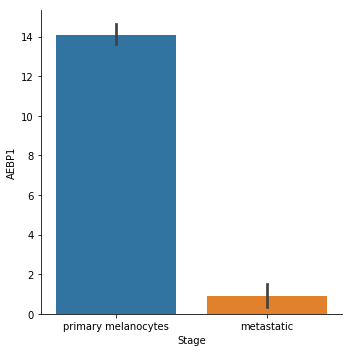

In [83]:
# Starting off with a bar plot
g = sns.catplot(x = 'Stage',y='AEBP1', data=dfT, kind="bar")
plt.show()
# Note that the error bars are plotted by default

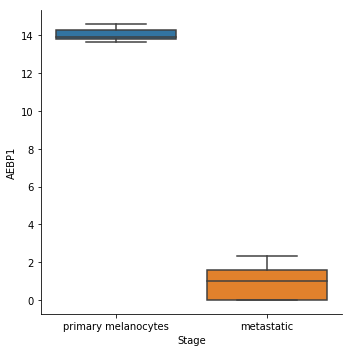

In [84]:
g = sns.catplot(x = 'Stage',y='AEBP1', data=dfT, kind="box")
plt.show()

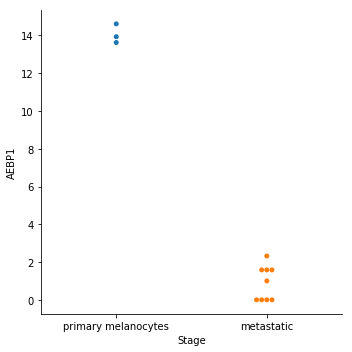

In [85]:
g = sns.catplot(x = 'Stage',y = 'AEBP1', data=dfT, kind="swarm")
plt.show()

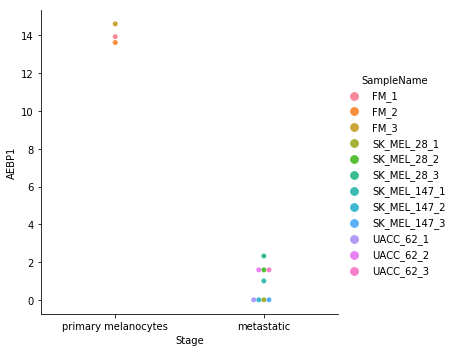

In [86]:
g = sns.catplot(x = 'Stage',y = 'AEBP1',hue = 'SampleName', data=dfT, kind="swarm")
plt.show()

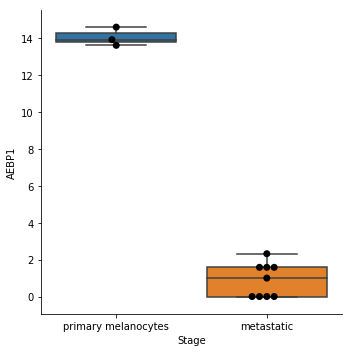

In [87]:
g = sns.catplot(x="Stage", y="AEBP1", kind="box", data=dfT)
sns.swarmplot(x="Stage", y="AEBP1", color="k", size=7, data=dfT, ax=g.ax);